1. Set up the environment

In [1]:
# Check python and CUDA version
!python --version
!nvcc --version

Python 3.6.6
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Tue_Jun_12_23:07:04_CDT_2018
Cuda compilation tools, release 9.2, V9.2.148


In [0]:
# Map your google drive 
from google.colab import drive
drive.mount('/content/drive/')
!ls "drive/My Drive"

In [3]:
!ls "drive/My Drive/app"

car.jpeg	  imagenet_class_index.json  ResNet.ipynb	      uwb_ID
cat.png		  main.ipynb		     run.mp4_yolo_out_py.avi
dogs_and_cats	  mnist_cnn.py		     test.ipynb
hymenoptera_data  outout.txt		     transferlearningUWB


In [0]:
!pip install -q keras
# Check keras installation
!pip show keras

Name: Keras
Version: 2.2.4
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, scipy, keras-applications, numpy, pyyaml, keras-preprocessing, h5py
Required-by: 


In [4]:
from keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet')
print(model.summary())

# Check the list of pre-trained models here
# https://keras.io/applications/

Using TensorFlow backend.


102858752/102853048 [==============================] - 3s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________

40960/35363 [==================================] - 0s 2us/step
Predicted: [('n03930630', 'pickup', 0.30666444), ('n04285008', 'sports_car', 0.280502), ('n03459775', 'grille', 0.15363851)]


Text(0.5,1,'Resized image to input the resnet')

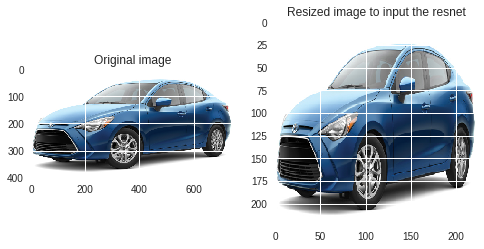

In [5]:
# 1. Using a pre-trained model 

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

import matplotlib.pyplot as plt

model = ResNet50(weights='imagenet')
#print(model.summary())

img_path = 'drive/My Drive/app/car.jpeg'
ori_img = image.load_img(img_path)
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

plt.subplot(121)
plt.imshow(ori_img)
plt.title('Original image')

plt.subplot(122)
plt.imshow(img)
plt.title('Resized image to input the resnet')

Keras code of Resnet50
https://github.com/keras-team/keras-applications/blob/master/keras_applications/resnet50.py
